# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
# Fetch current BTC price
#First step:

btc_response = requests.get(btc_url)
btc_response

btc_content = btc_response.content
btc_content


b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18844775,\n\t\t\t"total_supply": 18844775,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 61632.0000000000000000,\n\t\t\t\t\t"volume_24h": 51937897177,\n\t\t\t\t\t"market_cap": 1164031246386,\n\t\t\t\t\t"percentage_change_1h": -1.5544209195195400,\n\t\t\t\t\t"percentage_change_24h": 6.7240442100468100,\n\t\t\t\t\t"percentage_change_7d": 14.3566968957502000,\n\t\t\t\t\t"percent_change_1h": -1.5544209195195400,\n\t\t\t\t\t"percent_change_24h": 6.7240442100468100,\n\t\t\t\t\t"percent_change_7d": 14.3566968957502000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 76226.4576,\n\t\t\t\t\t"volume_24h": 64236791228.5136,\n\t\t\t\t\t"market_cap": 1439673845530.2,\n\t\t\t\t\t"percent_change_1h": -1.5544209195195400,\n\t\t\t\t\t"percent_change_24h": 6.7240442100468100,\n\t\t\t\t\t"

In [7]:
#Second step:

# Formatting as json
btc_data = btc_response.json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18844637,
            "total_supply": 18844637,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 61653.0,
                    "volume_24h": 45497198388,
                    "market_cap": 1164762177282,
                    "percentage_change_1h": 2.00104146310631,
                    "percentage_change_24h": 7.60801571111947,
                    "percentage_change_7d": 14.3946179716933,
                    "percent_change_1h": 2.00104146310631,
                    "percent_change_24h": 7.60801571111947,
                    "percent_change_7d": 14.3946179716933
                },
                "CAD": {
                    "price": 76412.7282,
                    "volume_24h": 56389227682.0872,
                    "mar

In [12]:
#Answer
btc_price = round(btc_data["data"]["1"]["quotes"]["USD"]["price"],2)
btc_price

61653.0

In [13]:
print("The value of Bitcoin is $" + str(btc_price))

The value of Bitcoin is $61653.0


In [15]:
# Fetch current ETH price
#First step:

eth_response = requests.get(eth_url)
eth_response

eth_content = eth_response.content
print(eth_content)


b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 117941406,\n\t\t\t"total_supply": 117941406,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3852.7400000000000000,\n\t\t\t\t\t"volume_24h": 22691877696,\n\t\t\t\t\t"market_cap": 454365364603,\n\t\t\t\t\t"percentage_change_1h": -1.3805235104185400,\n\t\t\t\t\t"percentage_change_24h": 1.9950876159289400,\n\t\t\t\t\t"percentage_change_7d": 7.1717813509519100,\n\t\t\t\t\t"percent_change_1h": -1.3805235104185400,\n\t\t\t\t\t"percent_change_24h": 1.9950876159289400,\n\t\t\t\t\t"percent_change_7d": 7.1717813509519100\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 4765.068832,\n\t\t\t\t\t"volume_24h": 28065314334.4128,\n\t\t\t\t\t"market_cap": 561959082940.99,\n\t\t\t\t\t"percent_change_1h": -1.3805235104185400,\n\t\t\t\t\t"percent_change_24h": 1.9950876159289400,\n\t\t\t\t\t"

In [16]:
#Second step:
# Formatting as json

eth_data = eth_response.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117941406,
            "total_supply": 117941406,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3852.74,
                    "volume_24h": 22691877696,
                    "market_cap": 454365364603,
                    "percentage_change_1h": -1.38052351041854,
                    "percentage_change_24h": 1.99508761592894,
                    "percentage_change_7d": 7.17178135095191,
                    "percent_change_1h": -1.38052351041854,
                    "percent_change_24h": 1.99508761592894,
                    "percent_change_7d": 7.17178135095191
                },
                "CAD": {
                    "price": 4765.068832,
                    "volume_24h": 28065314334.4128,
                   

In [17]:
#Answer 
eth_price = round(eth_data["data"]["1027"]["quotes"]["USD"]["price"],2)
eth_price


3852.74

In [18]:
print("The value of Ethereum is $" + str(eth_price))

The value of Ethereum is $3852.74


In [20]:
# Compute current value of my crypto

#Value of BTC:
my_btc_value = round(btc_price * my_btc,2)
my_btc_value

73983.6

In [21]:
#Value of ETH:
my_eth_value = round(eth_price * my_eth,2)
my_eth_value

20419.52

In [22]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73983.60
The current value of your 5.3 ETH is $20419.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [23]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [24]:
# Set Alpaca API key and secret

api_key = os.getenv("ALPACA_API_KEY")
type(api_key)

str

In [25]:
api_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(api_secret_key)

str

In [26]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2")

In [27]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


In [28]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
start_date = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-14", tz="America/New_York").isoformat()

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.tail(10)

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2021-10-01 00:00:00-04:00  114.82  115.0600  114.790  115.020  6840179   
2021-10-04 00:00:00-04:00  114.92  115.0300  114.795  114.940  3969883   
2021-10-05 00:00:00-04:00  114.82  114.8670  114.610  114.650  6211634   
2021-10-06 00:00:00-04:00  114.68  114.7300  114.590  114.700  4748378   
2021-10-07 00:00:00-04:00  114.46  114.5000  114.340  114.360  3586652   
2021-10-08 00:00:00-04:00  114.31  114.3500  114.070  114.120  4207570   
2021-10-11 00:00:00-04:00  114.01  114.0650  113.940  113.940  1999518   
2021-10-12 00:00:00-04:00  114.17  114.3800  114.110  114.355  3521504   
2021-10-13 00:00:00-04:00  114.43  114.6400  114.415  114.610  5301180   
2021-10-14 00:00:00-04:00  114.70  114.8496  114.630  114.840  3540673   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2021-10-01 00:00:00-04:00  430.98  436.0329  427.24  434.19  110774792  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830  
2021-10-06 00:00:00-04:00  429.27  435.1199  427.54  434.92   99477866  
2021-10-07 00:00:00-04:00  438.39  441.6800  438.20  438.64   64139858  
2021-10-08 00:00:00-04:00  439.48  439.8900  437.19  437.82   57510090  
2021-10-11 00:00:00-04:00  437.16  440.2600  434.62  434.67   54993389  
2021-10-12 00:00:00-04:00  435.67  436.1000  432.78  433.63   61078594  
2021-10-13 00:00:00-04:00  434.71  436.0500  431.54  435.13   63943229  
2021-10-14 00:00:00-04:00  439.08  442.6600  438.58  442.47   59812568

In [29]:
# Pick AGG and SPY close prices

agg_close_price = df_portfolio["AGG"]["close"]["2021-10-14"].round(2)
agg_close_price

114.84

In [30]:
spy_close_price = df_portfolio["SPY"]["close"]["2021-10-14"].round(2)
spy_close_price

442.47

In [31]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.84
Current SPY closing price: $442.47


In [32]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22123.50
The current value of your 200 AGG shares is $22968.00


### Savings Health Analysis

In [48]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = round(my_eth_value + my_btc_value,2)
shares = round(my_spy_value + my_agg_value,2)

print(crypto)
print(shares)

94403.12
45091.5


In [49]:
# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares], index=['crypto', 'shares'])
df_savings.columns = ['amount']
# Display savings DataFrame
display(df_savings)

,amount
crypto,94403.12
shares,45091.50


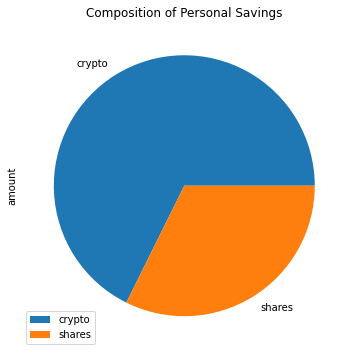

In [35]:
# Plot savings pie chart

plot = df_savings.plot.pie(title={"Composition of Personal Savings"}, ylabel='amount', subplots=True, figsize=(11, 6))

In [50]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
total_savings.round(2)


139494.62

In [37]:
# Validate saving health
savings_needed = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
     print("Congratulations!  You have reached your financial goal!")
else:
    print("You are $" + savings_needed + " away from your emergency fund goal.")

    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [38]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

tickers = ["AGG", "SPY" ]

# Display sample data
df_stock_data.head()


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Per homework instructions, used 500 runs, 30 years, and 40/60 split between bonds (AGG) /stocks (SPY)

num_sims = 500

MC_Stock = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

MC_Stock.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003208,0.984951,1.004585,1.007408,1.002493,0.992345,0.998916,1.009041,1.019800,1.008027,...,0.999615,0.994774,0.995986,0.988564,1.005930,0.995385,1.001824,1.000371,0.999772,1.020729
2,1.001964,0.988987,1.003100,1.010803,0.998091,1.007127,0.992102,1.001815,1.021806,1.017044,...,0.986097,0.993477,1.016379,0.985974,1.015531,0.998268,1.013078,1.002301,1.008364,1.025627
3,1.003603,0.979211,1.013956,1.018462,0.985257,1.006072,1.000229,1.011914,1.039404,1.012375,...,0.993372,1.003942,1.016186,0.986713,1.010100,0.996555,1.012811,0.991653,1.018769,1.033662
4,0.980470,0.994550,1.001594,1.029245,0.988907,1.020893,0.999453,1.011302,1.037347,1.013075,...,1.000878,1.010792,1.020401,0.960081,1.014141,0.992885,1.023746,0.998766,1.017290,1.024206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.935310,9.979330,37.970762,32.663654,55.319066,19.637623,22.813440,17.902957,9.594725,13.354249,...,21.632157,33.911193,9.990742,30.547532,31.171343,6.607918,52.364738,14.067298,11.158532,10.791451
7557,9.005036,9.925936,37.955687,32.704504,55.251623,19.618568,22.591762,17.982129,9.651760,13.369916,...,21.506520,34.049604,10.025110,30.834755,31.628886,6.582130,52.795442,14.321849,11.180133,10.753319
7558,9.059480,9.912174,38.058159,32.593404,55.119347,19.514176,22.369900,18.087502,9.531185,13.400031,...,21.441589,33.520068,9.960724,31.054173,31.971489,6.658110,53.367305,14.266728,11.118577,10.862800
7559,8.971183,9.897963,37.904520,32.801077,55.251506,19.355787,21.958014,18.053976,9.514944,13.301701,...,21.533658,33.526866,9.920774,31.064911,32.017188,6.696149,53.329401,14.162281,11.089452,10.917795


In [173]:
# Configure a Monte Carlo simulation to forecast one year daily returns


MC_Stock1 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [174]:
# Printing the simulation input data
MC_Stock.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [171]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Completed above.  Used MC_Stock.calc_cumulative_return()

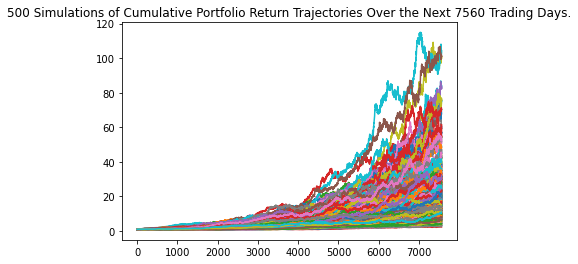

In [41]:
# Plot simulation outcomes
line_plot = MC_Stock.plot_simulation()

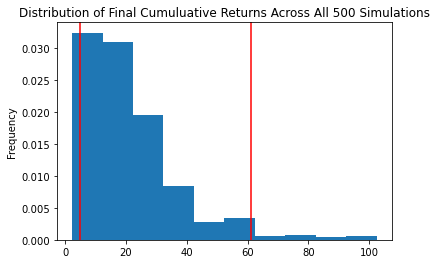

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Stock.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Stock.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean             21.588591
std              15.473493
min               2.331587
25%              11.174523
50%              17.611824
75%              26.858654
max             102.402825
95% CI Lower      4.782641
95% CI Upper     60.995535
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95652.82 and $1219910.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143479.24 and $1829866.06


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_Stock = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995775,1.006515,0.992174,0.990755,1.009601,1.011711,1.001302,0.998606,0.995619,0.997801,...,0.998209,1.000876,0.998494,0.997373,0.988382,0.991611,1.007823,1.005089,0.991691,0.991230
2,0.994685,1.014207,0.991426,0.998729,1.004733,1.019623,0.996715,1.006499,0.991715,1.004819,...,1.004562,0.999688,0.994018,0.989491,0.991219,0.984772,1.004507,1.010400,0.991665,0.992265
3,0.987035,1.010438,0.989768,0.982083,0.997762,1.021877,1.002467,1.003070,0.978546,1.008411,...,1.004585,1.007210,0.985905,0.989984,0.977655,0.980693,0.993400,0.998218,1.003630,0.995321
4,0.999006,1.019327,0.984181,0.965569,0.985049,1.027902,0.994653,1.019536,0.966178,0.985659,...,1.006502,1.005001,0.984164,0.990176,0.976398,0.978320,0.998629,0.994332,1.011735,0.998295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.111369,1.671392,1.325530,1.302294,1.217358,1.196523,1.844340,1.228663,1.009755,2.394634,...,3.076488,2.337596,1.932450,1.032159,1.438582,1.428572,1.392802,1.564567,1.275251,1.335649
1257,1.110728,1.649526,1.320119,1.297685,1.231333,1.184879,1.869398,1.240931,1.007009,2.353731,...,3.005666,2.330091,1.934932,1.037338,1.429122,1.427166,1.394394,1.564062,1.270188,1.346644
1258,1.128338,1.645603,1.330069,1.290321,1.239104,1.171973,1.853285,1.250681,1.017252,2.355922,...,3.025107,2.332549,1.950562,1.046422,1.439092,1.397702,1.400161,1.537363,1.277631,1.337163
1259,1.115600,1.652357,1.335590,1.282798,1.252113,1.171886,1.841759,1.261789,1.016159,2.366688,...,3.060738,2.306922,1.942561,1.051382,1.432106,1.391578,1.396296,1.522794,1.276084,1.351781


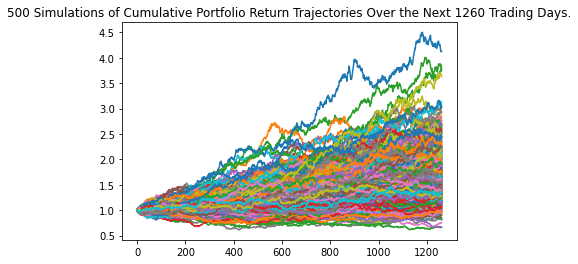

In [53]:
# Plot simulation outcomes
line_plot = MC_Stock.plot_simulation()

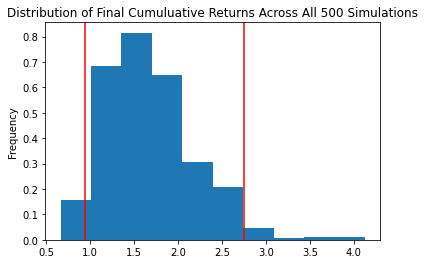

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Stock.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Stock.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              1.682144
std               0.507935
min               0.665678
25%               1.323935
50%               1.597037
75%               1.948211
max               4.125045
95% CI Lower      0.945389
95% CI Upper      2.749428
Name: 1260, dtype: float64


In [57]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56723.34 and $164965.7


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_Stock = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003460,0.995491,1.014649,1.020270,1.007025,0.991948,1.011965,1.013311,0.992627,0.989362,...,0.998270,0.995035,0.977102,0.989157,0.996239,1.004080,0.987435,0.999748,0.993869,1.006503
2,1.020893,0.992628,1.016858,1.029412,1.009677,0.996466,1.010695,1.006149,0.990072,0.993709,...,0.998202,1.014871,0.972856,0.999758,1.008158,0.999039,0.994457,0.997357,1.001876,1.003375
3,1.021397,0.990409,1.013292,1.039046,1.023092,0.985354,1.026961,1.007342,0.990374,1.000072,...,1.008873,1.005657,0.971363,0.998757,1.013572,1.000723,0.988059,0.996211,0.993959,0.992287
4,1.018892,0.998976,1.012323,1.037482,1.023487,0.987333,1.040328,1.010678,0.991621,1.005951,...,1.007181,1.010136,0.976360,1.005340,1.021241,1.001124,0.980718,1.001193,1.000305,0.986095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.956565,1.479645,3.866519,2.285962,2.972063,4.061011,2.047186,4.019015,1.734144,1.761752,...,2.633559,3.375264,2.249043,1.913368,4.284610,2.478986,3.177192,1.958148,1.708474,1.818310
2517,4.933389,1.468156,3.897046,2.297833,2.952643,4.075324,2.040796,4.013383,1.735543,1.750898,...,2.607156,3.372889,2.228158,1.907603,4.278421,2.474103,3.142254,1.928183,1.696620,1.821487
2518,4.849598,1.471882,3.897244,2.286027,2.925742,4.068022,2.038190,4.066588,1.733246,1.719605,...,2.576314,3.381727,2.218793,1.908835,4.269893,2.499493,3.150788,1.928956,1.711681,1.848579
2519,4.849553,1.488239,3.908205,2.269569,2.945800,4.096678,2.051412,4.043778,1.735082,1.728358,...,2.586207,3.340186,2.214252,1.909423,4.255130,2.483627,3.190500,1.927932,1.709509,1.865769


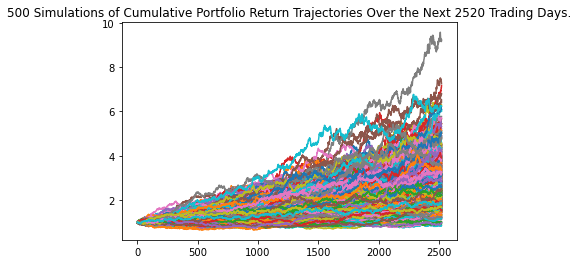

In [61]:
# Plot simulation outcomes
line_plot = MC_Stock.plot_simulation()

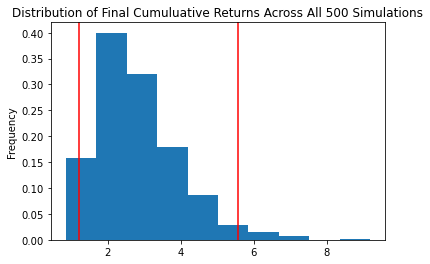

In [62]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Stock.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Stock.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              2.823693
std               1.145392
min               0.847416
25%               1.986066
50%               2.617820
75%               3.450978
max               9.196752
95% CI Lower      1.214831
95% CI Upper      5.560995
Name: 2520, dtype: float64


In [64]:
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72889.83 and $333659.7
